In [1]:
PATH_PREFIX = '../../'
import sys
sys.path.append(PATH_PREFIX)

In [2]:
import torch
import os
from utils.weight_sharing import *
from data.imagenette import *
from data.utils.download import *
from data.utils.imagenet_utils import *

BATCH_SIZE = 32

In [3]:
net = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)

dat = ImagenetteDataset(BATCH_SIZE, os.path.join(PATH_PREFIX, 'data/imagenette/'), val_split=0.9)


Using cache found in /home/coupekv/.cache/torch/hub/pytorch_vision_v0.10.0


In [4]:
get_accuracy(net, dat.test_dl, 'cpu', topk=5)

0.9618320465087891

In [5]:
net

MobileNetV2(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05,

In [6]:
ws_controller = WeightShare(net, lambda: get_accuracy(net, dat.test_dl, 'cpu', topk=5))
ws_controller.print_layers_info()

layer_name #weights #bias w_locked CR
features.0.0 864 0 False 1.00
features.1.conv.0.0 288 0 False 1.00
features.1.conv.1 512 0 False 1.00
features.2.conv.0.0 1536 0 False 1.00
features.2.conv.1.0 864 0 False 1.00
features.2.conv.2 2304 0 False 1.00
features.3.conv.0.0 3456 0 False 1.00
features.3.conv.1.0 1296 0 False 1.00
features.3.conv.2 3456 0 False 1.00
features.4.conv.0.0 3456 0 False 1.00
features.4.conv.1.0 1296 0 False 1.00
features.4.conv.2 4608 0 False 1.00
features.5.conv.0.0 6144 0 False 1.00
features.5.conv.1.0 1728 0 False 1.00
features.5.conv.2 6144 0 False 1.00
features.6.conv.0.0 6144 0 False 1.00
features.6.conv.1.0 1728 0 False 1.00
features.6.conv.2 6144 0 False 1.00
features.7.conv.0.0 6144 0 False 1.00
features.7.conv.1.0 1728 0 False 1.00
features.7.conv.2 12288 0 False 1.00
features.8.conv.0.0 24576 0 False 1.00
features.8.conv.1.0 3456 0 False 1.00
features.8.conv.2 24576 0 False 1.00
features.9.conv.0.0 24576 0 False 1.00
features.9.conv.1.0 3456 0 False 1.

In [7]:
len(ws_controller.model_layers)

53

<Figure size 640x480 with 0 Axes>

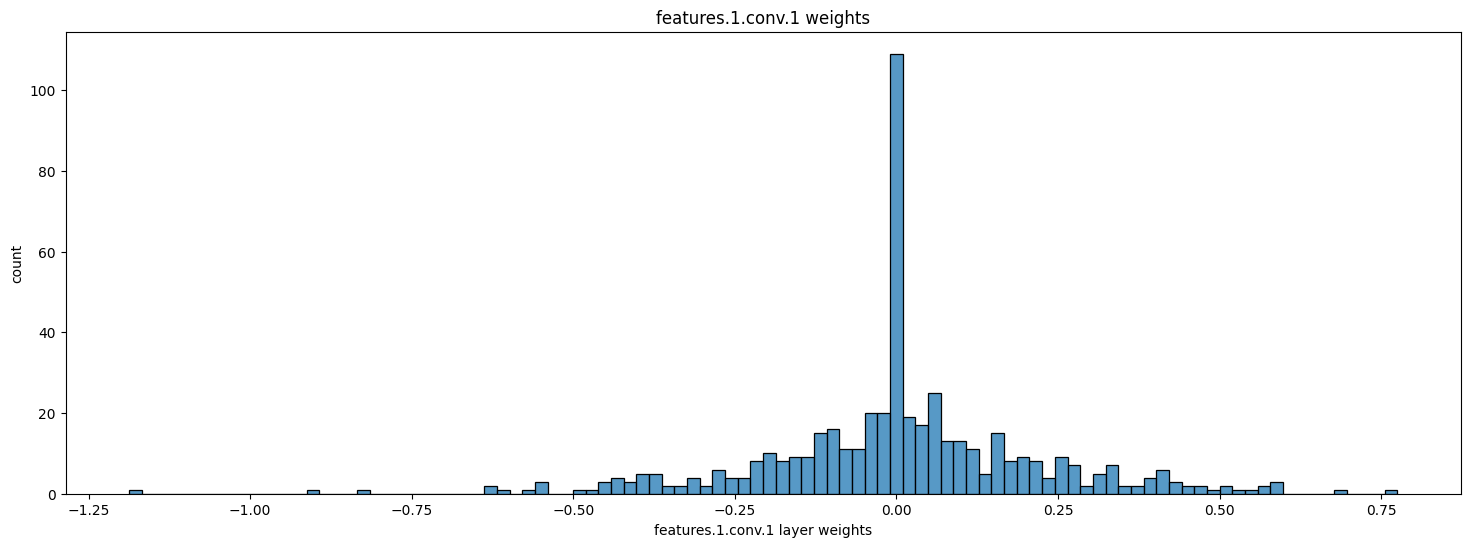

In [8]:
ws_controller.model_layers[2].plot_weight()

In [9]:
ws_controller.share([20 for _ in ws_controller.model_layers], verbose=True, prec_reduct=['f1' for _ in ws_controller.model_layers], minibatch_kmeans=True)

Share: 1/53 ---  Time: 0.06s	 Name: features.0.0	Before params: 864	 After params: 20	
Share: 2/53 ---  Time: 0.02s	 Name: features.1.conv.0.0	Before params: 288	 After params: 20	
Share: 3/53 ---  Time: 0.04s	 Name: features.1.conv.1	Before params: 512	 After params: 20	
Share: 4/53 ---  Time: 0.02s	 Name: features.2.conv.0.0	Before params: 1536	 After params: 20	
Share: 5/53 ---  Time: 0.02s	 Name: features.2.conv.1.0	Before params: 864	 After params: 20	
Share: 6/53 ---  Time: 0.02s	 Name: features.2.conv.2	Before params: 2304	 After params: 20	
Share: 7/53 ---  Time: 0.03s	 Name: features.3.conv.0.0	Before params: 3456	 After params: 20	
Share: 8/53 ---  Time: 0.02s	 Name: features.3.conv.1.0	Before params: 1296	 After params: 20	
Share: 9/53 ---  Time: 0.03s	 Name: features.3.conv.2	Before params: 3456	 After params: 20	
Share: 10/53 ---  Time: 0.03s	 Name: features.4.conv.0.0	Before params: 3456	 After params: 20	
Share: 11/53 ---  Time: 0.02s	 Name: features.4.conv.1.0	Before pa

{'accuracy': 0.0,
 'compression': 6.302115756779342,
 'inertias': [0.561406672000885,
  0.6922667026519775,
  0.45788711309432983,
  0.3707658648490906,
  0.13221386075019836,
  0.5329406261444092,
  0.34669795632362366,
  0.45124152302742004,
  0.35623878240585327,
  0.7041147351264954,
  0.06939181685447693,
  0.6660782098770142,
  0.4917949438095093,
  0.476230263710022,
  0.35878655314445496,
  0.3144582509994507,
  0.21466735005378723,
  0.288967102766037,
  0.6836516857147217,
  0.08505957573652267,
  0.9160479307174683,
  0.7581016421318054,
  0.29787352681159973,
  0.563170313835144,
  0.6000661253929138,
  0.28040915727615356,
  0.5770029425621033,
  0.6040504574775696,
  0.3325783610343933,
  0.7194887399673462,
  1.255645513534546,
  0.33161818981170654,
  1.5002782344818115,
  1.2154502868652344,
  0.4510405659675598,
  1.1159385442733765,
  1.2383440732955933,
  0.3835511803627014,
  1.5444765090942383,
  2.0985522270202637,
  0.13757292926311493,
  3.000865936279297,
  2.

In [10]:
classes = json.load(open('../data/imagenette/imagenet_class_index.json'))
classes_arr = []

for i in range(len(classes.keys())):
    classes_arr.append(classes[f'{i}'])

output = net(dat.test_dl.__getitem__(1)[0].unsqueeze(0))

probabilities = torch.nn.functional.softmax(output[0], dim=0)

top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(classes_arr[top5_catid[i]], top5_prob[i].item(), top5_catid[i])

FileNotFoundError: [Errno 2] No such file or directory: '../data/imagenette/imagenet_class_index.json'